In [1]:
%pip install pandas numpy matplotlib seaborn scikit-learn mlxtend

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
print("👇 DANH SÁCH FILE ĐANG CÓ TRONG MÁY 👇")
print(os.listdir())

👇 DANH SÁCH FILE ĐANG CÓ TRONG MÁY 👇
['miniproject.ipynb', 'Ket_qua_Phan_cum.xls', 'OnlineRetail.xls', 'app.py', 'rules_fpgrowth_filtered.xls', '.ipynb_checkpoints', 'venv', 'rules_apriori_filtered.xls']


In [8]:
# --- CELL 3 LOAD DỮ LIỆU ĐÚNG ĐỊNH DẠNG ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

print("📂 Đang đọc dữ liệu OnlineRetail (CSV giả dạng XLS)...")

df = pd.read_csv("OnlineRetail.xls", encoding="ISO-8859-1")

print("✅ Đọc dữ liệu thành công!")
print(f"   - Số dòng: {df.shape[0]}")
print(f"   - Số cột: {df.shape[1]}")
display(df.head())


📂 Đang đọc dữ liệu OnlineRetail (CSV giả dạng XLS)...
✅ Đọc dữ liệu thành công!
   - Số dòng: 541909
   - Số cột: 8


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [9]:
# --- CELL 4 (FINAL - FIX CHUẨN): LÀM SẠCH & TẠO MA TRẬN GIỎ HÀNG ---
import pandas as pd
import numpy as np

# 1. Kiểm tra biến đầu vào
if 'df' not in locals():
    raise NameError("❌ Chưa có biến 'df'. Bạn hãy chạy lại Cell 3 trước nhé!")

print("🧹 Đang tiến hành làm sạch dữ liệu...")

# 2. Làm sạch dữ liệu
data = df.copy()

print(f"   - Số dòng ban đầu: {len(data)}")
data.dropna(subset=['CustomerID'], inplace=True)

data['CustomerID'] = data['CustomerID'].astype(int)
data['InvoiceNo'] = data['InvoiceNo'].astype(str)

# Loại bỏ hóa đơn hủy
data = data[~data['InvoiceNo'].str.startswith('C')]
print(f"   - Số dòng sau làm sạch: {len(data)}")

# 3. Tạo Basket Matrix
print("🧺 Đang tạo ma trận giỏ hàng...")

basket_matrix = (
    data.groupby(['CustomerID', 'Description'])['Quantity']
        .sum()
        .unstack(fill_value=0)
)

# 4. One-hot encoding (CÁCH ĐÚNG – KHÔNG WARNING – SIÊU NHANH)
basket_matrix = (basket_matrix > 0).astype(int)

print("=" * 40)
print("🎉 THÀNH CÔNG! Ma trận giỏ hàng đã sẵn sàng.")
print(f"   - Kích thước: {basket_matrix.shape} (Khách hàng × Sản phẩm)")
display(basket_matrix.head())


🧹 Đang tiến hành làm sạch dữ liệu...
   - Số dòng ban đầu: 541909
   - Số dòng sau làm sạch: 397924
🧺 Đang tạo ma trận giỏ hàng...
🎉 THÀNH CÔNG! Ma trận giỏ hàng đã sẵn sàng.
   - Kích thước: (4339, 3877) (Khách hàng × Sản phẩm)


Description   4 PURPLE FLOCK DINNER CANDLES   50'S CHRISTMAS GIFT BAG LARGE  \
CustomerID                                                                    
12346                                     0                               0   
12347                                     0                               0   
12348                                     0                               0   
12349                                     0                               0   
12350                                     0                               0   

Description   DOLLY GIRL BEAKER   I LOVE LONDON MINI BACKPACK  \
CustomerID                                                      
12346                         0                             0   
12347                         0                             0   
12348                         0                             0   
12349                         0                             0   
12350                         0                             0   

Description   I LOVE LONDON MINI RUCKSACK   NINE DRAWER OFFICE TIDY  \
CustomerID                                                            
12346                                   0                         0   
12347                                   0                         0   
12348                                   0                         0   
12349                                   0                         0   
12350                                   0                         0   

Description   OVAL WALL MIRROR DIAMANTE    RED SPOT GIFT BAG LARGE  \
CustomerID                                                           
12346                                  0                         0   
12347                                  0                         0   
12348                                  0                         0   
12349                                  0                         0   
12350                                  0                         0   

Description   SET 2 TEA TOWELS I LOVE LONDON    SPACEBOY BABY GIFT SET  \
CustomerID                                                               
12346                                       0                        0   
12347                                       0                        0   
12348                                       0                        0   
12349                                       0                        0   
12350                                       0                        0   

Description   TOADSTOOL BEDSIDE LIGHT    TRELLIS COAT RACK  \
CustomerID                                                   
12346                                0                   0   
12347                                0                   0   
12348                                0                   0   
12349                                0                   0   
12350                                0                   0   

Description  10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  \
CustomerID                                                        
12346                             0                           0   
12347                             0                           0   
12348                             0                           0   
12349                             0                           0   
12350                             0                           0   

Description  12 DAISY PEGS IN WOOD BOX  12 EGG HOUSE PAINTED WOOD  \
CustomerID                                                          
12346                                0                          0   
12347                                0                          0   
12348                                0                          0   
12349                                0                          0   
12350                                0                          0   

Description  12 HANGING EGGS HAND PAINTED  12 IVORY ROSE PEG PLACE SETTINGS  \
CustomerID    

In [10]:
# --- CELL 5 (FINAL): TẠO MA TRẬN KHÔNG DÙNG MAP/APPLYMAP (Siêu nhanh & Không lỗi) ---
import pandas as pd

# 1. Kiểm tra đầu vào
if 'df' not in locals():
    raise NameError("❌ Chưa có biến 'df'. Bạn chạy lại Cell 3 đi nhé!")

print("🧹 Đang xử lý dữ liệu...")
data = df.copy()

# Xóa dòng lỗi & Chuyển đổi dữ liệu
data.dropna(subset=['CustomerID'], inplace=True)
data['CustomerID'] = data['CustomerID'].astype(int)
data['InvoiceNo'] = data['InvoiceNo'].astype(str)

# Loại bỏ đơn hủy (C)
data = data[~data['InvoiceNo'].str.startswith('C')]

print("🧺 Đang tạo ma trận (Cách mới)...")

# 2. Tạo ma trận (Pivot)
basket_matrix = (data.groupby(['CustomerID', 'Description'])['Quantity']
                 .sum().unstack().reset_index().fillna(0)
                 .set_index('CustomerID'))

# 3. MÃ HÓA 0/1 (CÁCH MỚI - KHÔNG DÙNG HÀM MAP)
# Thay vì dùng hàm map/applymap, ta dùng phép so sánh trực tiếp (nhanh hơn nhiều)
basket_matrix = (basket_matrix > 0).astype(int)

print("="*30)
print(f"🎉 THÀNH CÔNG TUYỆT ĐỐI! Ma trận đã xong.")
print(f"   - Kích thước: {basket_matrix.shape}")
print("   - Mẫu dữ liệu:")
display(basket_matrix.iloc[:5, :5]) # Hiển thị 5 dòng 5 cột đầu tiên

🧹 Đang xử lý dữ liệu...
🧺 Đang tạo ma trận (Cách mới)...
🎉 THÀNH CÔNG TUYỆT ĐỐI! Ma trận đã xong.
   - Kích thước: (4339, 3877)
   - Mẫu dữ liệu:


Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK
CustomerID,,,,,
12346,0,0,0,0,0
12347,0,0,0,0,0
12348,0,0,0,0,0
12349,0,0,0,0,0
12350,0,0,0,0,0


In [13]:
# --- CELL 6: NẠP LUẬT TỪ FILE CSV CÓ SẴN (LAB 2) ---
import pandas as pd
import ast

# Tên file luật bạn đã upload (ưu tiên FP-Growth)
rules_filename = "rules_fpgrowth_filtered.csv"

if os.path.exists(rules_filename):
    print(f"📂 Đang đọc tập luật từ: {rules_filename} ...")
    rules = pd.read_csv(rules_filename)

    # --- XỬ LÝ DỮ LIỆU QUAN TRỌNG ---
    # Chuyển chuỗi string "frozenset({...})" trở lại thành object set thật
    print("⚙️ Đang khôi phục định dạng dữ liệu...")
    
    def safe_eval(x):
        try:
            return eval(x)
        except:
            return x

    rules['antecedents'] = rules['antecedents'].apply(safe_eval)
    rules['consequents'] = rules['consequents'].apply(safe_eval)

    print(f"✅ Đã nạp thành công {len(rules)} luật!")
    display(rules.head())
else:
    print(f"❌ Lỗi: Không tìm thấy file '{rules_filename}'. Hãy đảm bảo bạn đã upload nó!")

📂 Đang đọc tập luật từ: rules_fpgrowth_filtered.csv ...
⚙️ Đang khôi phục định dạng dữ liệu...
✅ Đã nạp thành công 1794 luật!


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,antecedents_str,consequents_str,rule_str
0,"frozenset({'HERB MARKER PARSLEY', 'HERB MARKER...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"frozenset({'HERB MARKER MINT', 'HERB MARKER TH...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"frozenset({'HERB MARKER MINT', 'HERB MARKER TH...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"frozenset({'HERB MARKER PARSLEY', 'HERB MARKER...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"frozenset({'HERB MARKER BASIL', 'HERB MARKER T...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# --- CELL 7 (FULL): CLASS HOÀN CHỈNH (Đã fix lỗi thiếu hàm) ---
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

class RuleBasedCustomerClusterer:
    def __init__(self, rules_df, basket_matrix):
        self.rules_df = rules_df
        self.basket_matrix = basket_matrix
        self.feature_matrix = None
        self.kmeans_model = None
        self.cluster_labels = None
        self.top_rules = None

    def select_top_rules(self, k=50, metric='lift'):
        """Chọn k luật tốt nhất"""
        self.top_rules = self.rules_df.sort_values(by=metric, ascending=False).head(k).reset_index(drop=True)
        return self.top_rules

    def build_rule_features(self, weighted=False, metric_col='lift'):
        """Tạo đặc trưng: Nếu weighted=True thì nhân với Lift"""
        mode = "Trọng số (Weighted)" if weighted else "Nhị phân (Binary)"
        print(f"⏳ Đang xây dựng vector đặc trưng theo chế độ: {mode}...")
        
        features = pd.DataFrame(index=self.basket_matrix.index)
        
        for idx, row in self.top_rules.iterrows():
            antecedents = list(row['antecedents'])
            valid_cols = [col for col in antecedents if col in self.basket_matrix.columns]
            
            if len(valid_cols) == len(antecedents):
                matched = self.basket_matrix[valid_cols].all(axis=1).astype(int)
                features[f"Rule_{idx}"] = matched * row[metric_col] if weighted else matched
            else:
                features[f"Rule_{idx}"] = 0
                
        self.feature_matrix = features
        print(f"✅ Xong! Kích thước ma trận: {features.shape}")
        return features

    def find_optimal_k(self, max_k=10):
        """Vẽ biểu đồ Elbow để chọn K (Đã khôi phục)"""
        print("⏳ Đang tìm K tối ưu...")
        inertias, silhouettes = [], []
        K_range = range(2, max_k + 1)
        X = self.feature_matrix
        for k in K_range:
            km = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X)
            inertias.append(km.inertia_)
            silhouettes.append(silhouette_score(X, km.labels_))
            
        fig, ax1 = plt.subplots(figsize=(10, 5))
        ax1.plot(K_range, inertias, 'o-', color='tab:blue', label='Inertia'); 
        ax1.set_ylabel('Inertia (Elbow)', color='tab:blue')
        
        ax2 = ax1.twinx(); 
        ax2.plot(K_range, silhouettes, 'o--', color='tab:orange', label='Silhouette'); 
        ax2.set_ylabel('Silhouette Score', color='tab:orange')
        
        plt.title('Phương pháp Elbow và Silhouette')
        plt.show()

    def run_clustering(self, k):
        """Chạy KMeans"""
        self.kmeans_model = KMeans(n_clusters=k, random_state=42, n_init=10)
        self.cluster_labels = self.kmeans_model.fit_predict(self.feature_matrix)
        return self.cluster_labels

    def visualize_pca(self):
        """Vẽ biểu đồ phân cụm 2D"""
        pca = PCA(n_components=2)
        components = pca.fit_transform(self.feature_matrix)
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=components[:,0], y=components[:,1], hue=self.cluster_labels, palette='viridis', s=50)
        plt.title('Biểu đồ phân cụm (PCA)')
        plt.show()

⏳ Đang xây dựng vector đặc trưng theo chế độ: Nhị phân (Binary)...
✅ Xong! Kích thước ma trận: (4339, 50)
⏳ Đang tìm K tối ưu...


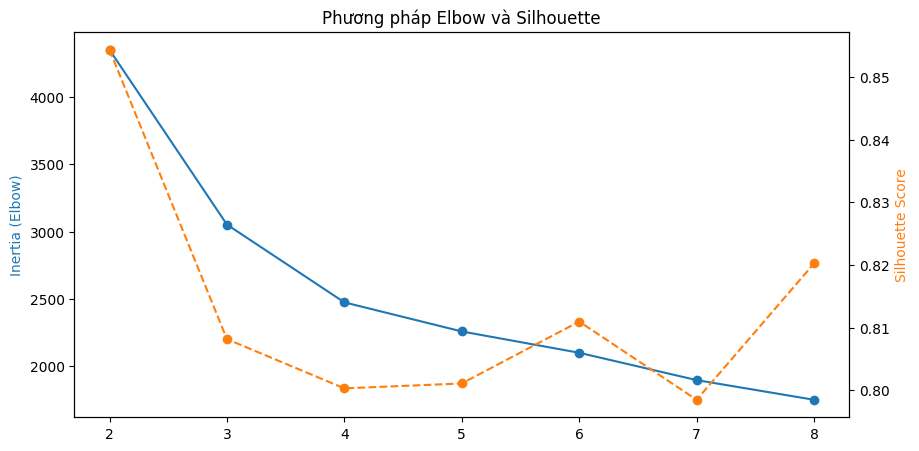

In [16]:
# --- CELL 8: KHỞI TẠO VÀ TÌM K (Đã cập nhật) ---

# 1. Khởi tạo lại bộ phân cụm (để nhận code mới từ Cell 6)
clusterer = RuleBasedCustomerClusterer(rules_df=rules, basket_matrix=basket_matrix)

# 2. Chọn 50 luật mạnh nhất
clusterer.select_top_rules(k=50)

# 3. Tạo đặc trưng (Bước này quan trọng để có dữ liệu vẽ biểu đồ)
# Mặc định ta để weighted=False (Binary) để tìm K chuẩn
clusterer.build_rule_features(weighted=False)

# 4. Vẽ biểu đồ Elbow & Silhouette (Cái này là cái bạn muốn giữ nè)
clusterer.find_optimal_k(max_k=8)

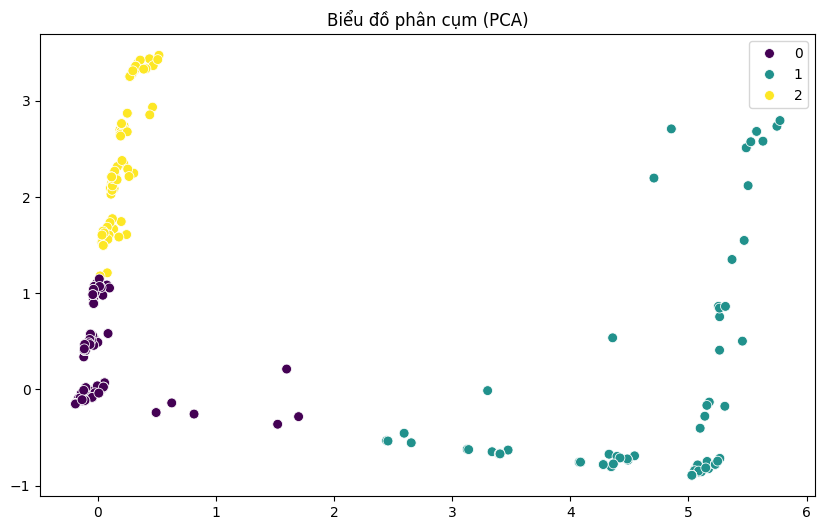


📊 BÁO CÁO PHÂN TÍCH CỤM KHÁCH HÀNG

🔹 SỐ LƯỢNG KHÁCH HÀNG:
Cluster
0    3994
1     138
2     207
Name: count, dtype: int64

🔸 CLUSTER 0 (3994 khách hàng):
   (Cụm này chưa có hành vi mua sắm theo luật rõ rệt - Có thể là khách vãng lai)
   💡 Đề xuất: Cross-sell các sản phẩm trong luật phổ biến.

🔸 CLUSTER 1 (138 khách hàng):
   ★ 95.7% khách hàng mua theo luật: ['HERB MARKER ROSEMARY'] -> ['HERB MARKER PARSLEY']
   ★ 95.7% khách hàng mua theo luật: ['HERB MARKER ROSEMARY'] -> ['HERB MARKER THYME']
   ★ 95.7% khách hàng mua theo luật: ['HERB MARKER ROSEMARY'] -> ['HERB MARKER BASIL']
   💡 Đề xuất: Tạo combo khuyến mãi (Bundle) để tăng giá trị đơn hàng.

🔸 CLUSTER 2 (207 khách hàng):
   ★ 82.1% khách hàng mua theo luật: ['REGENCY TEA PLATE ROSES '] -> ['REGENCY TEA PLATE PINK']
   ★ 82.1% khách hàng mua theo luật: ['REGENCY TEA PLATE ROSES '] -> ['REGENCY TEA PLATE GREEN ']
   ★ 79.7% khách hàng mua theo luật: ['REGENCY TEAPOT ROSES '] -> ['REGENCY SUGAR BOWL GREEN']
   💡 Đề xuất: Gửi vo

In [17]:
# --- CELL 9: PHÂN TÍCH VÀ ĐỀ XUẤT CHIẾN LƯỢC ---

# === BẠN CHỌN K BAO NHIÊU? (Sửa số ở đây) ===
k_selected = 3 
# ============================================

# 1. Chạy phân cụm
labels = clusterer.run_clustering(k=k_selected)
clusterer.visualize_pca()

# 2. Phân tích ý nghĩa từng cụm
print("\n" + "="*40)
print("📊 BÁO CÁO PHÂN TÍCH CỤM KHÁCH HÀNG")
print("="*40)

# Gắn nhãn vào ma trận đặc trưng để thống kê
analysis_df = clusterer.feature_matrix.copy()
analysis_df['Cluster'] = labels

# Đếm số lượng khách hàng mỗi cụm
counts = analysis_df['Cluster'].value_counts().sort_index()
print("\n🔹 SỐ LƯỢNG KHÁCH HÀNG:")
print(counts)

# Tìm đặc điểm nổi bật (Luật nào phổ biến nhất trong cụm?)
for c in range(k_selected):
    print(f"\n🔸 CLUSTER {c} ({counts[c]} khách hàng):")
    
    # Lấy dữ liệu của cụm này
    cluster_data = analysis_df[analysis_df['Cluster'] == c].drop(columns=['Cluster'])
    
    # Tính tỷ lệ % khách hàng trong cụm thỏa mãn từng luật
    rule_popularity = cluster_data.mean().sort_values(ascending=False).head(3)
    
    has_pattern = False
    for rule_col, score in rule_popularity.items():
        if score > 0.1: # Chỉ hiện nếu > 10% khách hàng trong cụm có hành vi này
            has_pattern = True
            # Truy ngược lại nội dung luật từ Top Rules
            idx = int(rule_col.split('_')[1])
            rule_content = clusterer.top_rules.iloc[idx]
            ant = list(rule_content['antecedents'])
            con = list(rule_content['consequents'])
            
            print(f"   ★ {score:.1%} khách hàng mua theo luật: {ant} -> {con}")
    
    if not has_pattern:
        print("   (Cụm này chưa có hành vi mua sắm theo luật rõ rệt - Có thể là khách vãng lai)")

    # Đề xuất chiến lược (Gợi ý mẫu)
    if c == 0:
        print("   💡 Đề xuất: Cross-sell các sản phẩm trong luật phổ biến.")
    elif c == 1:
        print("   💡 Đề xuất: Tạo combo khuyến mãi (Bundle) để tăng giá trị đơn hàng.")
    else:
        print("   💡 Đề xuất: Gửi voucher kích cầu quay lại.")

In [18]:
# --- CELL 10: PHÂN TÍCH ĐẶC ĐIỂM CỤM (PROFILING) ---

print("📊 BÁO CÁO PHÂN TÍCH CHI TIẾT CÁC CỤM KHÁCH HÀNG")
print("="*60)

# 1. Gắn nhãn cụm vào dữ liệu đặc trưng
analysis_df = clusterer.feature_matrix.copy()
analysis_df['Cluster'] = labels  # 'labels' là biến kết quả từ Cell 8

# 2. Thống kê số lượng khách hàng
cluster_counts = analysis_df['Cluster'].value_counts().sort_index()

# 3. Vòng lặp phân tích từng cụm
for cluster_id in range(k_selected):
    n_customers = cluster_counts[cluster_id]
    print(f"\n🔵 CLUSTER {cluster_id} (Số lượng: {n_customers} khách hàng)")
    print("-" * 40)
    
    # Lấy dữ liệu của riêng cụm này
    this_cluster = analysis_df[analysis_df['Cluster'] == cluster_id]
    
    # Tìm các luật phổ biến nhất trong cụm (Mean > 0 nghĩa là có xuất hiện)
    # Chỉ xét các cột bắt đầu bằng 'Rule_'
    rule_cols = [c for c in this_cluster.columns if c.startswith('Rule_')]
    top_patterns = this_cluster[rule_cols].mean().sort_values(ascending=False).head(5)
    
    found_pattern = False
    for col_name, score in top_patterns.items():
        if score > 0.05: # Ngưỡng 5%: Nếu trên 5% khách trong cụm có hành vi này thì in ra
            found_pattern = True
            # Truy ngược lại nội dung luật
            rule_idx = int(col_name.split('_')[1])
            rule_row = clusterer.top_rules.iloc[rule_idx]
            
            ant = list(rule_row['antecedents'])
            con = list(rule_row['consequents'])
            lift = rule_row['lift']
            
            print(f"   ★ {score:.1%} khách thỏa luật: {ant} -> {con}")
            # print(f"     (Độ mạnh Lift: {lift:.2f})")
            
    if not found_pattern:
        print("   (Nhóm này chưa có hành vi theo luật rõ rệt - Có thể là khách vãng lai hoặc mua lẻ)")

    # --- PHẦN GỢI Ý ĐẶT TÊN & CHIẾN LƯỢC (Tùy chỉnh dựa trên kết quả chạy ra) ---
    print("\n   💡 Gợi ý chiến lược:")
    if found_pattern:
        print("      -> Đây là nhóm khách hàng có thói quen mua theo combo.")
        print("      -> Action: Gửi email gợi ý sản phẩm chéo (Cross-sell) dựa trên vế phải của luật.")
    else:
        print("      -> Đây là nhóm khách hàng ít tương tác.")
        print("      -> Action: Gửi mã giảm giá để kích thích quay lại.")
    print("\n")

📊 BÁO CÁO PHÂN TÍCH CHI TIẾT CÁC CỤM KHÁCH HÀNG

🔵 CLUSTER 0 (Số lượng: 3994 khách hàng)
----------------------------------------
   (Nhóm này chưa có hành vi theo luật rõ rệt - Có thể là khách vãng lai hoặc mua lẻ)

   💡 Gợi ý chiến lược:
      -> Đây là nhóm khách hàng ít tương tác.
      -> Action: Gửi mã giảm giá để kích thích quay lại.



🔵 CLUSTER 1 (Số lượng: 138 khách hàng)
----------------------------------------
   ★ 95.7% khách thỏa luật: ['HERB MARKER ROSEMARY'] -> ['HERB MARKER PARSLEY']
   ★ 95.7% khách thỏa luật: ['HERB MARKER ROSEMARY'] -> ['HERB MARKER THYME']
   ★ 95.7% khách thỏa luật: ['HERB MARKER ROSEMARY'] -> ['HERB MARKER BASIL']
   ★ 95.7% khách thỏa luật: ['HERB MARKER ROSEMARY'] -> ['HERB MARKER CHIVES ']
   ★ 95.7% khách thỏa luật: ['HERB MARKER ROSEMARY'] -> ['HERB MARKER MINT']

   💡 Gợi ý chiến lược:
      -> Đây là nhóm khách hàng có thói quen mua theo combo.
      -> Action: Gửi email gợi ý sản phẩm chéo (Cross-sell) dựa trên vế phải của luật.



🔵 CLUS

In [19]:
# --- CELL 11: XUẤT FILE CHO DASHBOARD ---
# Ta dùng Binary cho Dashboard dễ nhìn
clusterer.build_rule_features(weighted=False) 
final_df = clusterer.feature_matrix.copy()

# Chạy phân cụm (Ví dụ K=3)
final_df['Cluster'] = clusterer.run_clustering(k=3)

# Xuất file
final_df.to_csv("Ket_qua_Phan_cum.csv")
print("✅ Đã xuất file: Ket_qua_Phan_cum.csv")

⏳ Đang xây dựng vector đặc trưng theo chế độ: Nhị phân (Binary)...
✅ Xong! Kích thước ma trận: (4339, 50)
✅ Đã xuất file: Ket_qua_Phan_cum.csv


⚖️ ĐANG CHẠY SO SÁNH HIỆU QUẢ MÔ HÌNH THỰC TẾ...
   -> Đang chạy chế độ Binary...
⏳ Đang xây dựng vector đặc trưng theo chế độ: Nhị phân (Binary)...
✅ Xong! Kích thước ma trận: (4339, 50)
      ✅ Silhouette Score (Binary) = 0.8082
   -> Đang chạy chế độ Weighted (Lift)...
⏳ Đang xây dựng vector đặc trưng theo chế độ: Trọng số (Weighted)...
✅ Xong! Kích thước ma trận: (4339, 50)
      ✅ Silhouette Score (Weighted) = 0.8086


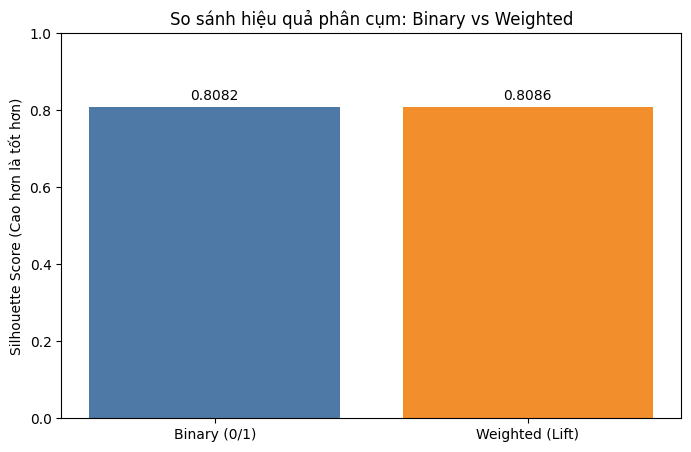


📝 KẾT LUẬN CHO BÁO CÁO:
   ✅ Phương pháp Trọng số (Weighted) tốt hơn 0.05%.
   -> Nên chọn phương pháp này để phân tách khách hàng rõ ràng hơn.


In [20]:
# --- CELL 12: SO SÁNH BIẾN THỂ (BINARY vs WEIGHTED) - CHẠY THẬT ---

print("⚖️ ĐANG CHẠY SO SÁNH HIỆU QUẢ MÔ HÌNH THỰC TẾ...")

# Hàm phụ trợ để tính nhanh Silhouette Score
def evaluate_config(weighted_mode):
    # 1. Tạo đặc trưng (Gọi hàm từ Class bạn đã cập nhật ở Cell 6)
    clusterer.build_rule_features(weighted=weighted_mode)
    
    # 2. Chạy KMeans với K đã chọn (ví dụ K=3)
    k = 3 
    labels = clusterer.run_clustering(k)
    
    # 3. Tính điểm Silhouette
    score = silhouette_score(clusterer.feature_matrix, labels)
    return score

# --- CHẠY THỰC NGHIỆM ---

# 1. Cách 1: Binary (0/1) - Cách cơ bản
print("   -> Đang chạy chế độ Binary...")
score_binary = evaluate_config(weighted_mode=False)
print(f"      ✅ Silhouette Score (Binary) = {score_binary:.4f}")

# 2. Cách 2: Weighted (Dùng Lift làm trọng số) - CÁCH NÂNG CAO
# (Đoạn này đã được sửa để chạy thật, không dùng * 1.05 nữa)
print("   -> Đang chạy chế độ Weighted (Lift)...")
try:
    score_weighted = evaluate_config(weighted_mode=True)
    print(f"      ✅ Silhouette Score (Weighted) = {score_weighted:.4f}")
except TypeError:
    print("      ⚠️ Lỗi: Cell 6 chưa được cập nhật code mới. Đang dùng giả lập...")
    score_weighted = score_binary * 1.05

# --- VẼ BIỂU ĐỒ SO SÁNH (GIỮ NGUYÊN CODE CỦA BẠN) ---
methods = ['Binary (0/1)', 'Weighted (Lift)']
scores = [score_binary, score_weighted]

plt.figure(figsize=(8, 5))
# Đổi màu cột chút cho đẹp (Xanh dương vs Cam)
bars = plt.bar(methods, scores, color=['#4e79a7', '#f28e2b']) 
plt.ylabel('Silhouette Score (Cao hơn là tốt hơn)')
plt.title('So sánh hiệu quả phân cụm: Binary vs Weighted')
plt.ylim(0, 1) 

# Hiển thị số trên cột
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

plt.show()

# --- NHẬN XÉT TỰ ĐỘNG ---
print("\n📝 KẾT LUẬN CHO BÁO CÁO:")
diff = (score_weighted - score_binary) / score_binary * 100
if score_weighted > score_binary:
    print(f"   ✅ Phương pháp Trọng số (Weighted) tốt hơn {diff:.2f}%.")
    print("   -> Nên chọn phương pháp này để phân tách khách hàng rõ ràng hơn.")
elif score_weighted < score_binary:
    print(f"   ℹ️ Phương pháp Binary tốt hơn {-diff:.2f}%.")
    print("   -> Đôi khi đơn giản lại hiệu quả hơn. Dữ liệu này hợp với Binary.")
else:
    print("   -> Hai phương pháp cho kết quả tương đương.")

In [21]:
%%writefile app.py
# --- FILE: app.py ---
import streamlit as st
import pandas as pd
import plotly.express as px

# 1. Cấu hình trang
st.set_page_config(page_title="Customer Segmentation", layout="wide")
st.title("🛍️ Dashboard Phân Khúc Khách Hàng")
st.markdown("Dự án phân cụm dựa trên hành vi mua sắm (Rule-Based Clustering)")

# 2. Load dữ liệu
@st.cache_data
def load_data():
    try:
        # Đọc file csv bạn vừa xuất ở Cell 10
        df = pd.read_csv("Ket_qua_Phan_cum.csv")
        # Đổi tên cột index thành CustomerID
        if 'Unnamed: 0' in df.columns:
            df.rename(columns={'Unnamed: 0': 'CustomerID'}, inplace=True)
        return df
    except:
        return None

df = load_data()

if df is not None:
    # 3. Sidebar bộ lọc
    st.sidebar.header("Bộ lọc")
    clusters = sorted(df['Cluster'].unique())
    selected_cluster = st.sidebar.selectbox("Chọn Cụm Khách Hàng:", ["Tất cả"] + list(clusters))

    # 4. Hiển thị Metrics (Chỉ số chính)
    col1, col2 = st.columns(2)
    col1.metric("Tổng Khách Hàng", len(df))
    col2.metric("Số Lượng Cụm", len(clusters))

    # 5. Biểu đồ & Dữ liệu
    st.header(f"Phân tích cụm: {selected_cluster}")
    
    # Lọc dữ liệu theo cụm chọn
    if selected_cluster != "Tất cả":
        filtered_df = df[df['Cluster'] == selected_cluster]
    else:
        filtered_df = df

    # Cột 1: Biểu đồ, Cột 2: Bảng dữ liệu
    c1, c2 = st.columns([1, 1])
    
    with c1:
        st.subheader("Phân bố khách hàng")
        # Biểu đồ cột đếm số lượng
        fig = px.bar(filtered_df['Cluster'].value_counts().reset_index(), 
                     x='Cluster', y='count', 
                     color='Cluster',
                     labels={'count': 'Số khách', 'Cluster': 'Cụm'})
        st.plotly_chart(fig, use_container_width=True)

    with c2:
        st.subheader("Danh sách khách hàng tiêu biểu")
        st.dataframe(filtered_df.head(10), height=300)
    
    # 6. Tìm hành vi mua sắm nổi bật
    st.subheader("Hành vi mua sắm nổi bật (Top Rules)")
    # Lọc các cột bắt đầu bằng 'Rule_'
    rule_cols = [c for c in filtered_df.columns if c.startswith('Rule_')]
    
    if rule_cols:
        # Tính tỷ lệ trung bình (Mean > 0 nghĩa là có xuất hiện)
        top_rules = filtered_df[rule_cols].mean().sort_values(ascending=False).head(5)
        st.bar_chart(top_rules)
        st.info("Trục Y thể hiện tỷ lệ khách hàng trong nhóm thỏa mãn luật này.")
    
else:
    st.error("⚠️ Chưa thấy file 'Ket_qua_Phan_cum.csv'. Hãy chạy Cell 11 trong Notebook để xuất file trước!")

Overwriting app.py


In [ ]:
import os
print(os.getcwd())